### Problem

**Our goal is to predict , when customer service representative call the customer, will they subscribe for a bank term deposit or not?**

**Dataset : https://archive.ics.uci.edu/ml/datasets/Bank+Marketing**

### Team

* [Ankur Rokad](https://github.com/ankurrokad)
* [Sahista Patel](https://github.com/Sahista-Patel)
* [Murali Krishna](https://github.com/muralikrishnarar)
* [Gursanjam Kaur](https://github.com/sv2021)




In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
import seaborn as sos
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.preprocessing import normalize
from scipy.stats import boxcox, probplot, norm, shapiro
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from time import time

In [2]:
#ANN Model
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/ankurrokad/Artificial-Neural-Network/main/bank-additional-full.csv', sep=';')
df.columns = ['age', 'job', 'marital', 'education', 'credit', 'housing', 'loan','contact', 'month', 'day_of_week',
              'duration', 'campaign', 'pdays','previous', 'poutcome', 'emp.var.rate', 'cons.price.idx','cons.conf.idx',
              'euribor3m', 'nr.employed', 'subscribed']
df.head()

age        job  marital    education   credit housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed  subscribed  
0          93.994          -36.4      4.857       5191.0          no  
1          93.994          -36.4      4.857       5191.0          no  
2          93.994          -36.4      4.857       5191.0          no  
3          93.994          -36.4      4.857       5191.0          no  
4          93.994          -36.4      4.857       5191.0          no  

[5 rows x 21 columns]

# Dataset Discription

### User Details:

1 - age (numeric)

2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')

3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')

5 - default: has credit in default? (categorical: 'no','yes','unknown')

6 - housing: has housing loan? (categorical: 'no','yes','unknown')

7 - loan: has personal loan? (categorical: 'no','yes','unknown')

### Related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')

9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')

11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

### Other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

14 - previous: number of contacts performed before this campaign and for this client (numeric)

15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

### Social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)

17 - cons.price.idx: consumer price index - monthly indicator (numeric)

18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)

19 - euribor3m: euribor 3 month rate - daily indicator (numeric)

20 - nr.employed: number of employees - quarterly indicator (numeric)

### Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')

# Pre processing

## EDA

In [5]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
credit            0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
subscribed        0
dtype: int64

*We dont have any null values, so no need to do any imputation or anything*

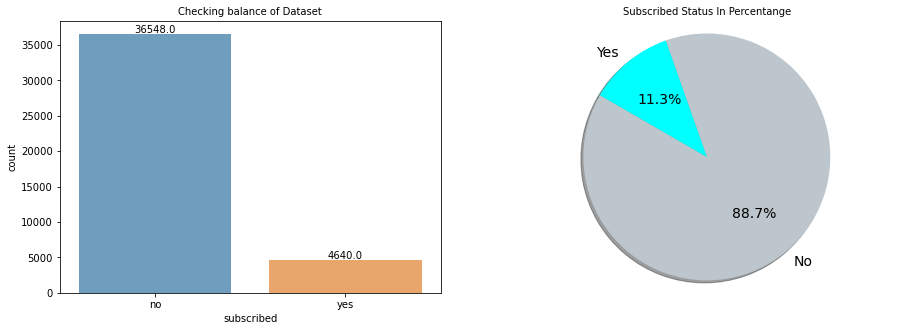

In [6]:
#The number of Subscribes users - Binary Yes/No, Checking balanced Dataset
plt.rcParams['figure.figsize']=15,5
plt.subplot(121)
plt.title('Checking balance of Dataset', fontsize=10)
s = sns.countplot(x="subscribed", data=df, alpha=0.7)
for p in s.patches:
    s.annotate(format(p.get_height(), '.1f'), 
               (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 4), 
                textcoords = 'offset points')


ax = plt.subplot(122)
mush_classpie = df['subscribed'].value_counts()
mush_size = mush_classpie.values.tolist()
mush_types = mush_classpie.axes[0].tolist()
mush_labels = 'No', 'Yes'
colors = ['#BCC6CC', '#00FFFF']
plt.title('Subscribed Status In Percentange', fontsize=10)
patches, texts, autotexts = plt.pie(mush_size, labels=mush_labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=150)
for text,autotext in zip(texts,autotexts):
    text.set_fontsize(14)
    autotext.set_fontsize(14)

plt.axis('equal')  
plt.show()

Text(0.5, 0, '---Job---')

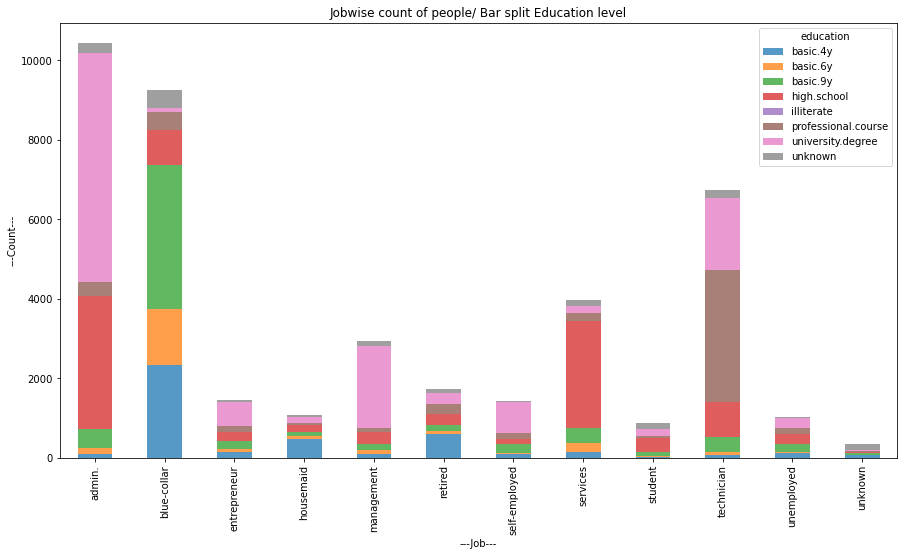

In [7]:
#barplot of job with bars split by education
#pivot table to get jobs as index and education as column. count of 'age' are the values
df_pivot = pd.pivot_table(df,columns='education', index='job', aggfunc='count',values='age')
df_pivot.plot(kind='bar',stacked=True, figsize=(15,8), alpha=0.75)
plt.title('Jobwise count of people/ Bar split Education level')
plt.ylabel('---Count---')
plt.xlabel('---Job---')

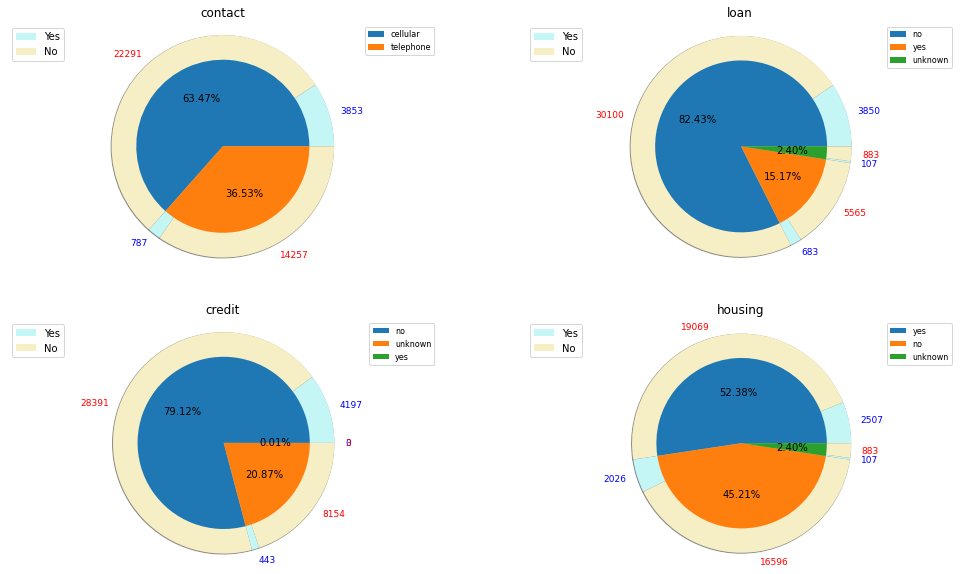

In [8]:

f, axes = plt.subplots(4,1, figsize=(17,10), sharey = True) 
num_col = ['contact', 'loan', 'credit', 'housing']

for j,col in enumerate(num_col):
    cols = df[col].value_counts()
    pop_size = cols.values.tolist()
    pop_types = cols.axes[0].tolist()
    poisonous_pop = [] 
    edible_pop = []   
    for pop in pop_types: 
        size = len(df[df[col] == pop].index)
        edibles = len(df[(df[col] == pop) & (df['subscribed'] == 'yes')].index)
        edible_pop.append(edibles)
        poisonous_pop.append(size-edibles)
    combine_ed_poi = []
    for i in range(0,len(edible_pop)):
        combine_ed_poi.append(edible_pop[i])
        combine_ed_poi.append(poisonous_pop[i])

    #Double pie chart.
    plt.subplot(2,2,j+1)
    plt.title(col)
    #Outer Pie Chart
    patches1, texts1 = plt.pie(combine_ed_poi,radius = 4.5,labels= combine_ed_poi,
                                    colors=['#C4F6F5','#F6EEC4'], shadow=True, labeldistance= 1.1)
    for i in range(0,len(texts1)):
        if(i%2==0):
            texts1[i].set_color('blue')
        else:
            texts1[i].set_color('red')
    for aut in texts1:
        aut.set_fontsize(9)
    #Inner Pie Chart
    patches2, texts2, autotexts2 = plt.pie(pop_size, radius = 3.5,
            autopct='%1.2f%%', shadow=True, labeldistance= 4.2)
    for aut in autotexts2:
        aut.set_fontsize(10)
        aut.set_horizontalalignment('center')
    #Set 2 Legends to the plot.
    first_legend   = plt.legend(patches1, ['Yes','No'], loc="upper left", fontsize=10)
    second_ledgend = plt.legend(patches2, pop_types, loc="best",fontsize=8)
    plt.gca().add_artist(first_legend)
    plt.axis('equal')
plt.show()

In [9]:
def absolute_value(val,month):
    a = round(val*sum(df[df['month']==month].subscribed.value_counts())/100,0)
    return a

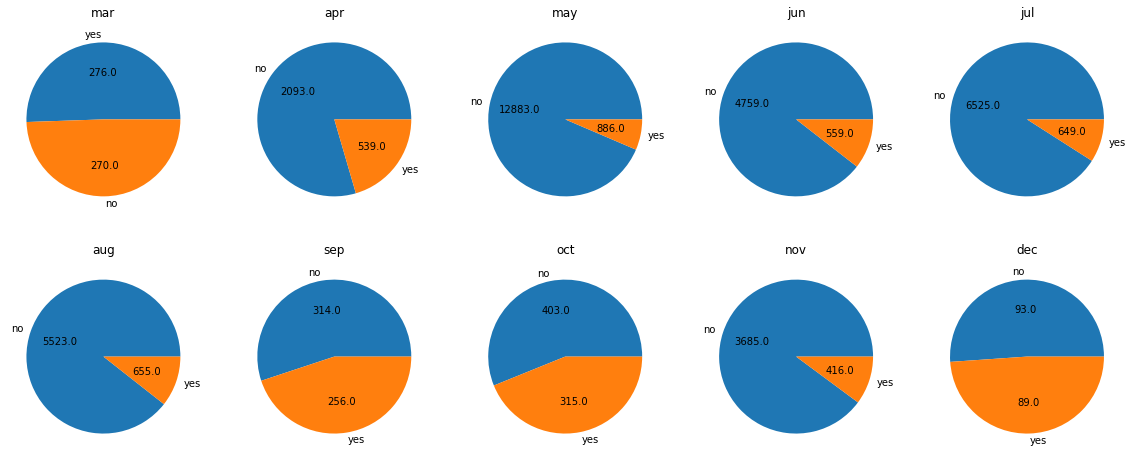

In [10]:
fig, axs = plt.subplots(2,5,figsize=(20,8))
plot_dict=dict(zip(range(0,10),[axs[0,0],axs[0,1],axs[0,2],axs[0,3],axs[0,4],
                     axs[1,0],axs[1,1], axs[1,2], axs[1,3], axs[1,4]]))

#enumerate returns tuple of month and a number(idx)
for idx, month in enumerate(['mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']):
    #gets axes from dict and plots on it
    plot_dict.get(idx).pie(df[df['month']==month].subscribed.value_counts(),
             labels=df[df['month']==month].subscribed.value_counts().index, autopct=lambda val: absolute_value(val,month))
    plot_dict.get(idx).set_title(month)

## Label Encoding

In [11]:
df.select_dtypes('object').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   job          41188 non-null  object
 1   marital      41188 non-null  object
 2   education    41188 non-null  object
 3   credit       41188 non-null  object
 4   housing      41188 non-null  object
 5   loan         41188 non-null  object
 6   contact      41188 non-null  object
 7   month        41188 non-null  object
 8   day_of_week  41188 non-null  object
 9   poutcome     41188 non-null  object
 10  subscribed   41188 non-null  object
dtypes: object(11)
memory usage: 3.5+ MB


In [12]:
dict_job = {
    "job":{
        "housemaid":1,
        "unemployed":0,
        "entrepreneur":4,
        "blue-collar":1,
        "services":3,
        "admin.":2,
        "technician":2,
        "retired":1,
        "management":4,
        "self-employed":3,
        "unknown":1,
        "student":0.5
    }}
dict_education = {
    "education":{
        "basic.4y":1,
        "basic.6y":1,
        "basic.9y":1,
        "high.school":1,
        "professional.course":2,
        "university.degree":2,
        "illiterate":0.9,
        "unknown":0.9
    }}

dict_poutcome = {
    "poutcome":{
        "nonexistent":0,
        "failure":0,
        "success":1
    }}
dict_y = {
    "subscribed":{
        "no":0,
        "yes":1
    }}

In [13]:
for i in [dict_poutcome,dict_y, dict_education, dict_job]:
    df.replace(i,inplace=True)

In [14]:
df.head()

age  job  marital  education   credit housing loan    contact month  \
0   56  1.0  married        1.0       no      no   no  telephone   may   
1   57  3.0  married        1.0  unknown      no   no  telephone   may   
2   37  3.0  married        1.0       no     yes   no  telephone   may   
3   40  2.0  married        1.0       no      no   no  telephone   may   
4   56  3.0  married        1.0       no      no  yes  telephone   may   

  day_of_week  ...  campaign  pdays  previous  poutcome  emp.var.rate  \
0         mon  ...         1    999         0         0           1.1   
1         mon  ...         1    999         0         0           1.1   
2         mon  ...         1    999         0         0           1.1   
3         mon  ...         1    999         0         0           1.1   
4         mon  ...         1    999         0         0           1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed  subscribed  
0          93.994          -36.4      4.857       5191.0           0  
1          93.994          -36.4      4.857       5191.0           0  
2          93.994          -36.4      4.857       5191.0           0  
3          93.994          -36.4      4.857       5191.0           0  
4          93.994          -36.4      4.857       5191.0           0  

[5 rows x 21 columns]

In [15]:
#Encoding rest of the un ordinal categorical variable 
lc_X1 = LabelEncoder()
lst = ['marital','credit','housing','loan']

for i in lst:
    df[i] = lc_X1.fit_transform(df[i])

In [16]:
df_1 = pd.get_dummies(df,
                      columns=['marital','credit','housing','loan'],
                      drop_first=True)
df.head()

age  job  marital  education  credit  housing  loan    contact month  \
0   56  1.0        1        1.0       0        0     0  telephone   may   
1   57  3.0        1        1.0       1        0     0  telephone   may   
2   37  3.0        1        1.0       0        2     0  telephone   may   
3   40  2.0        1        1.0       0        0     0  telephone   may   
4   56  3.0        1        1.0       0        0     2  telephone   may   

  day_of_week  ...  campaign  pdays  previous  poutcome  emp.var.rate  \
0         mon  ...         1    999         0         0           1.1   
1         mon  ...         1    999         0         0           1.1   
2         mon  ...         1    999         0         0           1.1   
3         mon  ...         1    999         0         0           1.1   
4         mon  ...         1    999         0         0           1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed  subscribed  
0          93.994          -36.4      4.857       5191.0           0  
1          93.994          -36.4      4.857       5191.0           0  
2          93.994          -36.4      4.857       5191.0           0  
3          93.994          -36.4      4.857       5191.0           0  
4          93.994          -36.4      4.857       5191.0           0  

[5 rows x 21 columns]

## Checking the correlation 

In [17]:
corr = df_1.corr()
print(corr['subscribed'].sort_values(axis=0, ascending=True))

nr.employed      -0.354678
pdays            -0.324914
euribor3m        -0.307771
emp.var.rate     -0.298334
cons.price.idx   -0.136211
credit_1         -0.099293
campaign         -0.066357
marital_1        -0.043398
job              -0.027963
loan_2           -0.004466
credit_2         -0.003041
loan_1           -0.002270
housing_1        -0.002270
marital_3         0.005211
housing_2         0.011743
age               0.030399
education         0.045916
marital_2         0.054133
cons.conf.idx     0.054878
previous          0.230181
poutcome          0.316269
duration          0.405274
subscribed        1.000000
Name: subscribed, dtype: float64


In [18]:
# Let's Remove features that has less correlation
df_1.drop(columns=[
    'nr.employed','pdays','euribor3m','emp.var.rate',
    'cons.price.idx','contact','month','campaign', 'day_of_week'
    ], axis=0, inplace=True)

Text(0.5, 1.0, 'Correlation')

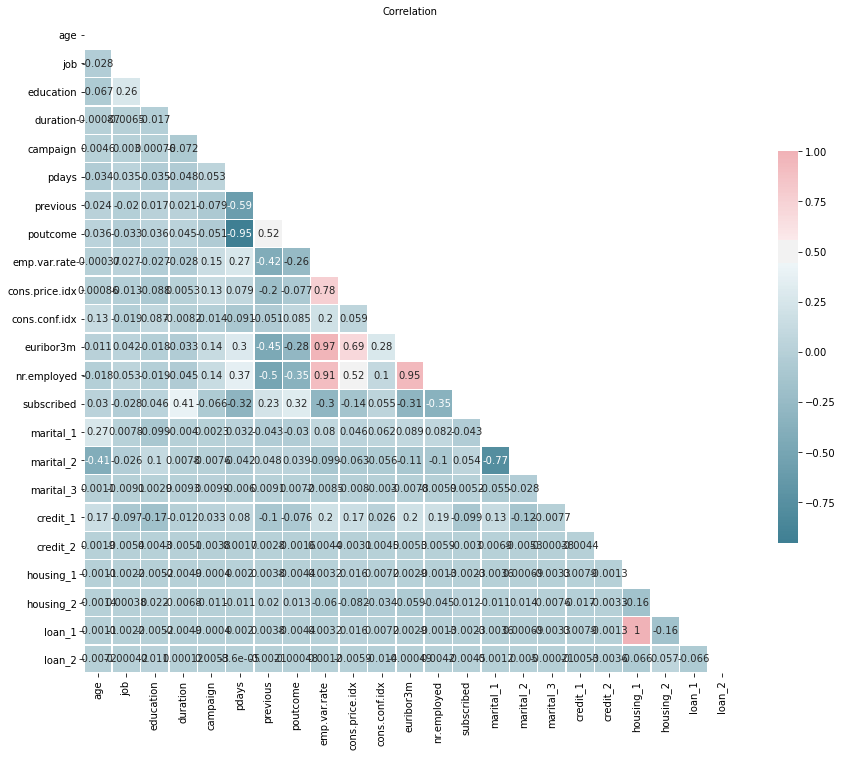

In [19]:
mask = np.triu(np.ones_like(corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(15,12))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
#Drawing heatmap
sns.heatmap(corr, 
            mask=mask,
            cmap=cmap, 
            vmax=1, 
            center=0.5, 
            square=True, 
            linewidths=.5, 
            cbar_kws={"shrink": .6},
            annot=True
           )
plt.title("Correlation", fontsize =10)

## Assign Variable

In [20]:
X = df_1.drop(columns = 'subscribed',axis=1).values
y = df_1['subscribed'].values 

## Splitting the data and Scaling

In [21]:
#split training - test set
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=101)

In [22]:
df_1['subscribed'].value_counts()

0    36548
1     4640
Name: subscribed, dtype: int64

In [23]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

# Printing Results

In [24]:
# We are using this function to calculate the accuracy, precision, recall, f1_score etc.
# Hyperparams: model = string, labels = y, pred = model.pred(y)
def print_scores(model, labels, pred):
    # Confusion matrix
    accuracy = round(accuracy_score(labels, pred), 3)
    precision = round(precision_score(labels, pred), 3)    
    recall = round(recall_score(labels, pred), 3)
    f1 = round(f1_score(labels, pred), 3)
    
    cm = confusion_matrix(labels, pred)
    df = pd.DataFrame(cm)
    
    labels = [f"TP: {df[0][0]} ",f"TN: {df[1][1]} ",f"FP: {df[1][0]} ",f"FN: {df[0][1]} "]
    labels = np.asarray(labels).reshape(2,2)
    
    f, ax = plt.subplots(figsize=(6,5))
    sns.heatmap(cm, annot=labels, fmt='', cmap='Blues', ax=ax)    
    print(f"{model}:: Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, f1_score: {f1}")

In [25]:
# print the cross-validation results
def print_cv_result(results):
    print(f"Best Params : {results.best_params_}\n")
    
    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print(f'{round(mean, 3)} (+/-{round(std * 2, 3)}) for {params}')

# SVM

SVM Time:18927.620000000003
SVM:: Accuracy: 0.901, Precision: 0.671, Recall: 0.293, f1_score: 0.408


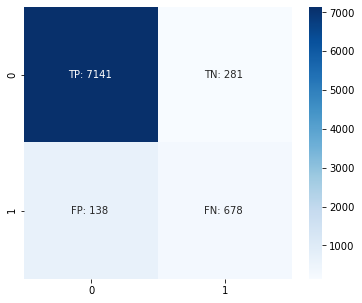

In [26]:
start = time()
svc = SVC(kernel = "rbf", C=10)
svc.fit(X_train,y_train)
y_pred_svm = svc.predict(X_test)
end = time()
print(f"SVM Time:{round((end - start), 5) * 1000}")
print_scores("SVM", y_test, y_pred_svm)

# Logistic Regression

LGR:: Accuracy: 0.901, Precision: 0.664, Recall: 0.309, f1_score: 0.421


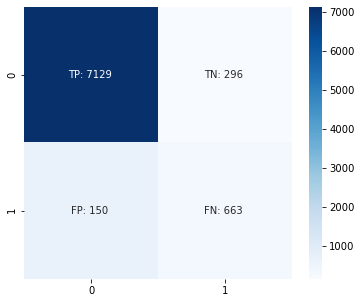

In [27]:
lgr = LogisticRegression()
lgr.fit(X_train, y_train)
y_pred_lgr = lgr.predict(X_test)
print_scores("LGR", y_test, y_pred_lgr)

# ANN

In [28]:
classifier = Sequential()
print(df_1.shape)

(41188, 17)


##### Configuring the layers
* units — number of nodes for the layer
* activation — activation function we use hidden layers
* kernel_initializer — initiating weight as close as 0
* input_dim — number of independent variable in our dataset

<!-- ![img](https://miro.medium.com/max/4200/1*GTLzJ0sUmwDPb9uVffnZ6g.png) -->

In [29]:
classifier.add(Dense(units=13,
                     activation='relu',
                     kernel_initializer='uniform',
                     input_dim=16))
classifier.add(Dropout(rate=0.1))

In [30]:
classifier.add(Dense(units=13,
                     activation='relu',
                     kernel_initializer='uniform'))
classifier.add(Dropout(rate=0.1))

In [31]:
classifier.add(Dense(units=1,
                     activation='sigmoid',
                     kernel_initializer='uniform'))

In [32]:
#compile ANN
classifier.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy'])

#####  Training and testing

* batch_size — number of sample it takes for each iteration
* epochs — number of iteration to optimise the model

In [33]:
#fitting ANN
start = time()
classifier.fit(x=X_train, y=y_train, batch_size=10,epochs=100)

Epoch 1/100
3295/3295 [==============================] - 2s 498us/step - loss: 0.2651 - accuracy: 0.8889
Epoch 2/100
3295/3295 [==============================] - 1s 411us/step - loss: 0.2432 - accuracy: 0.9031
Epoch 3/100
3295/3295 [==============================] - 1s 410us/step - loss: 0.2416 - accuracy: 0.9045
Epoch 4/100
3295/3295 [==============================] - 1s 416us/step - loss: 0.2407 - accuracy: 0.9051
Epoch 5/100
3295/3295 [==============================] - 1s 406us/step - loss: 0.2383 - accuracy: 0.9045
Epoch 6/100
3295/3295 [==============================] - 1s 406us/step - loss: 0.2374 - accuracy: 0.9053
Epoch 7/100
3295/3295 [==============================] - 1s 432us/step - loss: 0.2370 - accuracy: 0.9051
Epoch 8/100
3295/3295 [==============================] - 1s 426us/step - loss: 0.2371 - accuracy: 0.9057
Epoch 9/100
3295/3295 [==============================] - 1s 419us/step - loss: 0.2361 - accuracy: 0.9058
Epoch 10/100
3295/3295 [==============================]

Epoch 78/100
3295/3295 [==============================] - 2s 619us/step - loss: 0.2170 - accuracy: 0.9072
Epoch 79/100
3295/3295 [==============================] - 2s 503us/step - loss: 0.2181 - accuracy: 0.9072
Epoch 80/100
3295/3295 [==============================] - 2s 462us/step - loss: 0.2159 - accuracy: 0.9065
Epoch 81/100
3295/3295 [==============================] - 1s 453us/step - loss: 0.2182 - accuracy: 0.9066
Epoch 82/100
3295/3295 [==============================] - 1s 452us/step - loss: 0.2192 - accuracy: 0.9066
Epoch 83/100
3295/3295 [==============================] - 2s 479us/step - loss: 0.2196 - accuracy: 0.9063
Epoch 84/100
3295/3295 [==============================] - 2s 464us/step - loss: 0.2180 - accuracy: 0.9075
Epoch 85/100
3295/3295 [==============================] - 1s 447us/step - loss: 0.2179 - accuracy: 0.9068
Epoch 86/100
3295/3295 [==============================] - 1s 447us/step - loss: 0.2182 - accuracy: 0.9071
Epoch 87/100
3295/3295 [======================

ANN Time:147645.1
ANN:: Accuracy: 0.906, Precision: 0.652, Recall: 0.416, f1_score: 0.508


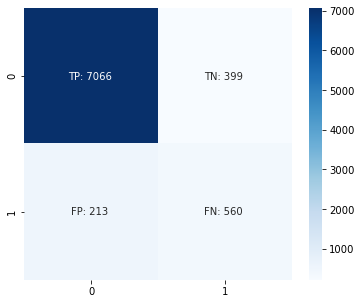

In [34]:
y_pred_ann = classifier.predict(X_test)
end = time()
print(f"ANN Time:{round((end - start), 5) * 1000}")
"""
y_pred array contains boolean value of whether dependent variable has more than 50% chance of being ‘yes’ or not.

If ‘yes’ it will be True, if ‘no’ it will be ‘False’.
"""
y_pred_ann_bool = y_pred_ann > 0.5

print_scores("ANN", y_test, y_pred_ann_bool)

# References

* Activation Function : https://www.analyticsvidhya.com/blog/2020/01/fundamentals-deep-learning-activation-functions-when-to-use-them/
* Keras : https://medium.com/datadriveninvestor/building-neural-network-using-keras-for-classification-3a3656c726c1
* Confusion Matrix : https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9